In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from glob import glob
import pandas as pd
from tqdm import tqdm
import numpy as np

In [6]:
base_dir_col = '/usr/users/agecker/datasets/pig_data_jonathan/weight_data/Gr_2_WG_2/Gr_2_WG_2_900222000834601_color'
base_dir_depth = '/usr/users/agecker/datasets/pig_data_jonathan/weight_data/Gr_2_WG_2/Gr_2_WG_2_900222000834601_depth'


In [18]:
filepaths_color = glob(os.path.join(base_dir_col, '*'))
filepaths_depth = glob(os.path.join(base_dir_depth, '*'))
filepaths_color = sorted(filepaths_color, key=lambda x: int(x.split('_')[-1][:-4]))
filepaths_depth = sorted(filepaths_depth, key=lambda x: int(x.split('_')[-1][:-4]))

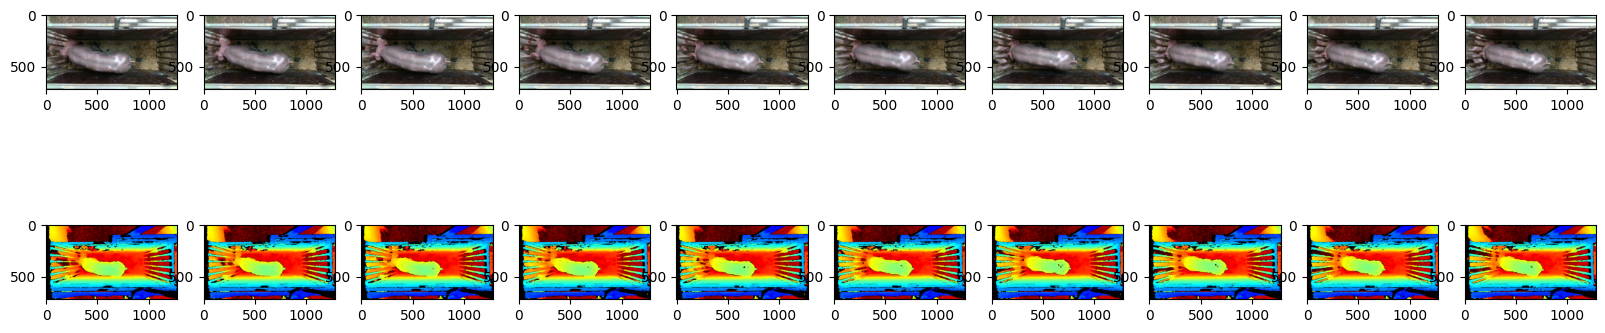

In [27]:
def print_images(filepaths_color, filepaths_depth, frame_start, frame_end, figsize):

    fig, axs = plt.subplots(2, frame_end - frame_start, figsize=figsize)
    for i, j in enumerate(range(frame_start, frame_end)):
        img_col = mpimg.imread(filepaths_color[j])
        img_depth = mpimg.imread(filepaths_depth[j])
        axs[0, i].imshow(img_col)
        axs[1, i].imshow(img_depth)


print_images(filepaths_color, filepaths_depth, 50, 60, (20, 5))

# data preparation

In [75]:
import os
import shutil

# Define the source and destination folders
# source_folder = '/usr/users/agecker/datasets/pig_data_jonathan/weight_data/val'  # Replace with the actual path
source_folder = '/usr/users/agecker/datasets/pig_data_jonathan/weight_data/train'  # Replace with the actual path
color_folder = os.path.join(source_folder, 'color')
depth_folder = os.path.join(source_folder, 'depth')

# List all folders in the source directory
folders = [f for f in os.listdir(source_folder) if os.path.isdir(os.path.join(source_folder, f))]
folders.remove('color')
folders.remove('depth')

# Iterate through folders
for folder in folders:
    folder_path = os.path.join(source_folder, folder)
    
    # List files in the folder
    files = os.listdir(folder_path)
    
    # Iterate through files
    for file in files:
        file_path = os.path.join(folder_path, file)
        
        # Check if file ends with 'color' or 'depth'
        if file.endswith('color'):
            destination = os.path.join(color_folder, file)
        elif file.endswith('depth'):
            destination = os.path.join(depth_folder, file)
        else:
            raise Exception(f"File '{file}' in folder '{folder}' does not end with 'color' or 'depth'.")
        
        # Move the file
        shutil.move(file_path, destination)

print("Files moved successfully.")


Files moved successfully.


In [90]:
base_path = '/usr/users/agecker/datasets/pig_data_jonathan/weight_data'
weight_data = pd.read_csv(os.path.join(base_path, 'gewichte_relevant.csv'), sep=';')
transponder = weight_data['Transponder']
transponder_values = transponder.values

In [ ]:
for row in weight_data.iterrows():
    print(row)

In [102]:
# n_pigs_with_weight = 0
# n_pigs_without_weight = 0
# matched_rows = 0

for folder in os.listdir(base_path):
    if folder == 'archive' or folder == 'gewichte.csv' or folder == 'visualization.ipynb' or folder == 'gewichte_relevant.csv' or folder == 'no_weight_available':
        continue

    color_folder = os.path.join(base_path, folder, 'color')
    depth_folder = os.path.join(base_path, folder, 'depth')


    for individual_pig_folder in tqdm(os.listdir(color_folder)):
        parts_string = individual_pig_folder.split('_')
        group = int(parts_string[1])
        wiegung = int(parts_string[3])
        transponder_num = int(parts_string[-2])

        for row in weight_data.iterrows():
            row_num = row[0]
            row = row[1]
            row_gruppe = row['Gruppe']
            row_wiegung = row['Wiegung']
            row_transponder = row['Transponder']

            if group == row_gruppe and wiegung == row_wiegung and transponder_num == row_transponder:
                # matched_rows += 1
                weight_data.loc[row_num, 'col_img'] = individual_pig_folder


        

    for individual_pig_folder in tqdm(os.listdir(depth_folder)):
        parts_string = individual_pig_folder.split('_')
        group = int(parts_string[1])
        wiegung = int(parts_string[3])
        transponder_num = int(parts_string[-2])

        for row in weight_data.iterrows():
            row_num = row[0]
            row = row[1]
            row_gruppe = row['Gruppe']
            row_wiegung = row['Wiegung']
            row_transponder = row['Transponder']

            if group == row_gruppe and wiegung == row_wiegung and transponder_num == row_transponder:
                # matched_rows += 1
                weight_data.loc[row_num, 'depth_img'] = individual_pig_folder


# print(n_pigs_without_weight / 2)
# print(n_pigs_with_weight / 2)

100%|██████████| 397/397 [00:23<00:00, 16.72it/s]


In [118]:
weight_data[~weight_data['col_img'].isna()].to_csv('/usr/users/agecker/datasets/pig_data_jonathan/weight_data/gewichte_final.csv', sep=';', index=False)

In [ ]:
weight_data.to_csv

In [2]:
test = pd.read_csv('/usr/users/agecker/datasets/pig_data_jonathan/weight_data/weights_train.csv', sep=';')

In [3]:
test

,group,weighting,transponder,sex,date,weight,col_img,depth_img
0,2,2,900222000834742,2.0,24.07.2019,"52,0",Gr_2_WG_2_900222000834742_color,Gr_2_WG_2_900222000834742_depth
1,2,2,900222000834743,3.0,24.07.2019,"52,5",Gr_2_WG_2_900222000834743_color,Gr_2_WG_2_900222000834743_depth
2,2,2,900222000834744,3.0,24.07.2019,"53,5",Gr_2_WG_2_900222000834744_color,Gr_2_WG_2_900222000834744_depth
3,2,2,900222000834745,2.0,24.07.2019,"37,0",Gr_2_WG_2_900222000834745_color,Gr_2_WG_2_900222000834745_depth
4,2,2,900222000834746,2.0,24.07.2019,"0,0",Gr_2_WG_2_900222000834746_color,Gr_2_WG_2_900222000834746_depth
...,...,...,...,...,...,...,...,...
392,3,2,900222000834924,3.0,15.08.2019,"64,5",Gr_3_WG_2_900222000834924_color,Gr_3_WG_2_900222000834924_depth
393,3,2,900222000834040,3.0,15.08.2019,"65,0",Gr_3_WG_2_900222000834040_color,Gr_3_WG_2_900222000834040_depth
394,3,2,900222000834041,2.0,15.08.2019,"61,0",Gr_3_WG_2_900222000834041_color,Gr_3_WG_2_900222000834041_depth
395,3,2,900222000834042,3.0,15.08.2019,"66,0",Gr_3_WG_2_900222000834042_color,Gr_3_WG_2_900222000834042_depth


In [15]:
dest_dir = '/usr/users/agecker/datasets/pig_data_jonathan/weight_data/no_weight_data'
source_dir = '/usr/users/agecker/datasets/pig_data_jonathan/weight_data/depth'
import shutil


for i, row in test.iterrows():
    if not type(row['weight']) == str:
        folder_name = f"Gr_{row['group']}_WG_{row['weighting']}_{row['transponder']}_depth"
        shutil.move(os.path.join(source_dir, folder_name), os.path.join(dest_dir, folder_name))

In [16]:
len(os.listdir('/usr/users/agecker/datasets/pig_data_jonathan/weight_data/color'))

498

# downsample images

In [ ]:
from PIL import Image
import os
from tqdm import tqdm

def downsample_image(input_path, output_path, factor):
    image = Image.open(input_path)
    downsampled_image = image.resize((image.width // factor, image.height // factor), Image.ANTIALIAS)
    downsampled_image.save(output_path)

def process_folder(input_dir, output_dir, factor):
    for root, dirs, files in tqdm(os.walk(input_dir)):
        for file in files:
            input_path = os.path.join(root, file)
            output_path = input_path.replace(input_dir, output_dir)
            output_dir_to_create = os.path.dirname(output_path)

            # Create the output directory if it doesn't exist
            os.makedirs(output_dir_to_create, exist_ok=True)

            # Downsample the image and save it
            downsample_image(input_path, output_path, factor)

# Define input and output folders
input_dir = '/usr/users/agecker/datasets/pig_data_jonathan/weight_data/color'
output_dir = '/usr/users/agecker/datasets/pig_data_jonathan/weight_data/color_subsampled'

# Define the downsampling factor (2 for reducing resolution by half)
downsampling_factor = 2

# Process the images
process_folder(input_dir, output_dir, downsampling_factor)
